### 안내페이지
#### https://www.notion.so/rollinstar/Python-cc8a370daf784bf9b084ca06a37c5a1e

# GIS (Geographic Information System or Science)

* 지리공간데이터를 생성/편집/저장/분석/시각화하기 위한 모든 Science

#### Geographic
* 지표상에 있는 모든 지리(地理)적 사상(Feature)

#### Information
* 디지털화된 데이터

#### System / Science
* 지리공간데이터를 처리하기 위한 모든 기법/방법

# GeoPandas

* `python`으로 지리공간데이터(Geospatial Data)를 다루기 위한 오픈소스 라이브러리
* `pandas`를 확장한 라이브러리
* `python`에는 다양한 지리공간데이터를 처리할 수 있는 라이브러리들이 존재 (ex:  `GDAL/OGR`, `shapely`, `fiona`, `descrates`)
    * `GeoPandas`는 내부적으로 이런 라이브러리들을 내부적으로 활용하고 있다.

In [1]:
# GeoPandas설치하기ddlfjffadfadfaf
# !pip3 install shapely
# !pip3 install geopandas

#### Import library

In [2]:
# _01 라이브러리 추가하기
import geopandas as gpd

In [3]:
# Nice representation of dataframe in markdown
import pandas as pd
import copy
from IPython.display import Markdown, display

def df2md(df, maxlen=20):
    _df = copy.deepcopy(df)
    
    for col in _df.columns:
        _df[col] = _df[col].astype('str')
        if (_df[col].str.len()> maxlen).any() :
            _df[col].loc[_df[col].str.len() > maxlen] = _df[col].str.slice(stop=maxlen) + ' ...'

    if '(index)' not in _df.columns:
        _df.insert(0, '(index)', df.index)
        
    fmt = ['---' for i in range(len(_df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=_df.columns)
    df_formatted = pd.concat([df_fmt, _df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    _df.drop(columns='(index)', axis=1, inplace=True)

#### Reading data
- `GeoPandas`는 vector 타입의 대부분 포맷 들을 읽을 수 있습니다.
    - `shp`, `geojson`, `GML`, `KML`...

In [4]:
# _02 서울시 행정동 .shp파일
_h_dong = './maps/seoul_h_dong/seoul_h_dong.shp'

In [5]:
# _03 지도 파일을 불러와 GeoDataFrame 생성하기
seoul_h_dong_gdf = gpd.read_file(_h_dong, encoding='utf-8')

###### **Tip!** 한글이 깨질 경우 gpd.read_file의 encoding 옵션 변경

In [6]:
seoul_h_dong_gdf['TOTAL_POP'].dtypes

dtype('int64')

In [31]:
# _04 데이터 확인하기
df2md(seoul_h_dong_gdf.head(10))

(index)|SGG_NM|DONG_NM|SGG_CODE|H_CODE|SEDAE|SEDAE_INGU|TOTAL_POP|MALE_POP|FEMALE_POP|65_OVER|geom
---|---|---|---|---|---|---|---|---|---|---|---
0|종로구|사직동|11110|1111000|4414|2.14|9717|4467|5250|1708|POLYGON ((126.976888 ...
1|종로구|삼청동|11110|1111000|1414|2.06|3097|1459|1638|634|POLYGON ((126.982689 ...
2|종로구|부암동|11110|1111000|4325|2.39|10726|5160|5566|1748|POLYGON ((126.975851 ...
3|종로구|평창동|11110|1111000|7510|2.53|19163|9032|10131|3037|POLYGON ((126.975074 ...
4|종로구|무악동|11110|1111000|3024|2.75|8375|3921|4454|1279|POLYGON ((126.960673 ...
5|종로구|교남동|11110|1111000|4379|2.34|10363|4850|5513|1406|POLYGON ((126.969048 ...
6|종로구|가회동|11110|1111000|2085|2.17|4657|2194|2463|900|POLYGON ((126.989135 ...
7|종로구|종로1.2.3.4가동|11110|1111000|5378|1.41|8592|5045|3547|1865|POLYGON ((126.996499 ...
8|종로구|종로5·6가동|11110|1111000|3174|1.69|5690|3096|2594|1089|POLYGON ((127.010160 ...
9|종로구|이화동|11110|1111000|4462|1.85|8752|4075|4677|1302|POLYGON ((127.007332 ...


In [8]:
# _05 Dataframe 개요정보 확인하기
seoul_h_dong_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 11 columns):
SGG_NM        424 non-null object
DONG_NM       424 non-null object
SGG_CODE      424 non-null object
H_CODE        424 non-null object
SEDAE         424 non-null int64
SEDAE_INGU    424 non-null float64
TOTAL_POP     424 non-null int64
MALE_POP      424 non-null int64
FEMALE_POP    424 non-null int64
65_OVER       424 non-null int64
geometry      424 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 36.6+ KB


In [9]:
# _06 데이터 확인 요령 info() & head()를 동시에.... 취향대로
seoul_h_dong_gdf.info()
df2md(seoul_h_dong_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 11 columns):
SGG_NM        424 non-null object
DONG_NM       424 non-null object
SGG_CODE      424 non-null object
H_CODE        424 non-null object
SEDAE         424 non-null int64
SEDAE_INGU    424 non-null float64
TOTAL_POP     424 non-null int64
MALE_POP      424 non-null int64
FEMALE_POP    424 non-null int64
65_OVER       424 non-null int64
geometry      424 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 36.6+ KB


(index)|SGG_NM|DONG_NM|SGG_CODE|H_CODE|SEDAE|SEDAE_INGU|TOTAL_POP|MALE_POP|FEMALE_POP|65_OVER|geometry
---|---|---|---|---|---|---|---|---|---|---|---
0|종로구|사직동|11110|1111000|4414|2.14|9717|4467|5250|1708|POLYGON ((126.976888 ...
1|종로구|삼청동|11110|1111000|1414|2.06|3097|1459|1638|634|POLYGON ((126.982689 ...
2|종로구|부암동|11110|1111000|4325|2.39|10726|5160|5566|1748|POLYGON ((126.975851 ...
3|종로구|평창동|11110|1111000|7510|2.53|19163|9032|10131|3037|POLYGON ((126.975074 ...
4|종로구|무악동|11110|1111000|3024|2.75|8375|3921|4454|1279|POLYGON ((126.960673 ...


In [10]:
# _07 Dataframe 통계정보 확인하기
df2md(seoul_h_dong_gdf.describe())

(index)|SEDAE|SEDAE_INGU|TOTAL_POP|MALE_POP|FEMALE_POP|65_OVER
---|---|---|---|---|---|---
count|424.0|424.0|424.0|424.0|424.0|424.0
mean|9953.02358490566|2.3381367924528305|23878.724056603773|11693.058962264151|12185.665094339623|3219.6367924528304
std|3889.0310752080863|0.34843326492864635|9431.363644288916|4594.843032205243|4866.5098217325985|1279.225377002793
min|365.0|1.35|905.0|450.0|455.0|114.0
25%|7358.25|2.1275|17607.25|8669.75|9028.5|2340.75
50%|9723.0|2.33|23178.0|11361.5|11732.5|3107.0
75%|12395.0|2.5425|29671.0|14559.0|14998.0|3965.5
max|25214.0|3.42|55569.0|26975.0|29079.0|7244.0


In [11]:
# _08 평균값 가져오기
seoul_h_dong_gdf.TOTAL_POP.mean()

23878.724056603773

##### **Tip!** describe() 명령어의 결과물은 `pd.DataFrame`. 아래와 같은 접근이 가능함.

In [12]:
seoul_h_dong_gdf.TOTAL_POP.describe().loc['mean']

23878.724056603773

In [13]:
# _09 Serise 데이터 가져오기
seoul_h_dong_gdf.DONG_NM[:10]

0            사직동
1            삼청동
2            부암동
3            평창동
4            무악동
5            교남동
6            가회동
7    종로1.2.3.4가동
8        종로5·6가동
9            이화동
Name: DONG_NM, dtype: object

#### GeoPandas Data Structure(데이터 구조)
##### GeoDataFrame / Series / GeoSeries

In [14]:
# _10 GeoPandas 데이터구조 확인하기
print(type(seoul_h_dong_gdf))
print(type(seoul_h_dong_gdf.TOTAL_POP))
print(type(seoul_h_dong_gdf.geometry))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>
<class 'geopandas.geoseries.GeoSeries'>


### GeoSeries 알아보기
* Pandas의 Series + Geometry

#### GeoSeries 속성(Attributes)
* geom_type
* area
* bounds
* total_bounds

In [15]:
# _11 geometry type 확인하기
seoul_h_dong_gdf['geometry'].geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
419    Polygon
420    Polygon
421    Polygon
422    Polygon
423    Polygon
Length: 424, dtype: object

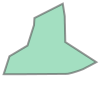

In [16]:
# _12 Polygon 확인하기 
seoul_h_dong_gdf['geometry'][10]

##### **Tip!** geometry의 형상이 아닌 값을 확인하고 싶으면 범위로 호출

In [17]:
seoul_h_dong_gdf['geometry'][10:11]

10    POLYGON ((127.0157260408003 37.57298376265474,...
Name: geometry, dtype: object

In [18]:
# _13 GeoSeries 면적 계산하기
seoul_h_dong_gdf['geometry'].area[:10]

0    0.000119
1    0.000139
2    0.000225
3    0.000920
4    0.000048
5    0.000035
6    0.000062
7    0.000244
8    0.000065
9    0.000077
dtype: float64

In [19]:
# _14 길이 확인하기
seoul_h_dong_gdf['geometry'].length[:10]

0    0.047948
1    0.063533
2    0.081741
3    0.135755
4    0.028105
5    0.030201
6    0.037011
7    0.082341
8    0.033248
9    0.035567
dtype: float64

In [20]:
# _15 좌표체계 확인하기
seoul_h_dong_gdf.crs = {'init': 'epsg:4326'} # WGS84 - Google Map 등 가장 일반적인 좌표체계
seoul_h_dong_gdf.crs

{'init': 'epsg:4326'}

##### **Tip!** 한국의 주요 좌표계 및 Proj4 인자 정리
> https://www.osgeo.kr/17
<br>   
  
###### 1. WGS84 경위도: GPS가 사용하는 좌표계  
* EPSG: 4326, EPSG: 4166 (Korean 1995)  
* +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs   
<br>  
  
###### 2. Bessel 1841 경위도: 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계  
* EPSG: 4004, EPSG: 4162 (Korean 1985)  
* +proj=longlat +ellps=bessel +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43  
<br>  
  
###### 3. GRS80 경위도: WGS84와 거의 유사   
* EPSG:4019, EPSG:4737 (Korean 2000)  
* +proj=longlat +ellps=GRS80 +no_defs  
<br>  
  
###### 4. Google Mercator: 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계  
* EPSG:3857(공식), EPSG:900913(통칭)  
* +proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +no_defs  


In [21]:
# _16 GeoSeries bbox가져오기
df2md(seoul_h_dong_gdf['geometry'].bounds[:10])

(index)|minx|miny|maxx|maxy
---|---|---|---|---
0|126.96281041047263|37.56819441770833|126.9770344988775|37.57960153712449
1|126.97358726355343|37.57552636292861|126.98947579208668|37.59656422224408
2|126.9527493088157|37.583811410465415|126.97585113775686|37.607058994444564
3|126.94998323286886|37.59506510110588|126.98774119171668|37.63228533903874
4|126.95355601666945|37.572961218450786|126.96284099051198|37.58169718780316
5|126.9595707378107|37.56579436403002|126.96904837001854|37.57666158609274
6|126.98283620716704|37.576674025462005|126.98977388297557|37.59139446162827
7|126.97688884274817|37.5681085386568|127.00162224915923|37.587469119033116
8|126.99796924004315|37.56959157448218|127.01016044839562|37.57670881432088
9|126.99641172469615|37.575897283278564|127.00884131783923|37.584756278282704


In [22]:
# _17 지도 전체 bbox가져오기
seoul_h_dong_gdf['geometry'].total_bounds

array([126.7642783,  37.4290107, 127.1835519,  37.7010799])

#### GeoSeries Method
* centroid
* distance()
* representative_point()
* plot()

In [23]:
# _18 centroid : 폴리곤 중심점 
seoul_h_dong_gdf['geometry'].centroid[:10]

0    POINT (126.9701436944192 37.57410804599586)
1    POINT (126.9811137153512 37.58801343786098)
2    POINT (126.9625567482273 37.59669865828479)
3    POINT (126.9692740196906 37.61396501050034)
4    POINT (126.9589890500936 37.57774075208369)
5     POINT (126.9641609771286 37.5710529786725)
6     POINT (126.986618225203 37.58267644374536)
7    POINT (126.9897333207583 37.57507655259654)
8    POINT (127.0042409849724 37.57301599654881)
9    POINT (127.0030692561881 37.57969000921075)
dtype: object

In [24]:
# _19 Representative Point : 폴리곤을 대표하는 '폴리곤 내부의' 점. 
seoul_h_dong_gdf['geometry'].representative_point()[:10]

0    POINT (126.9708877848629 37.57336152811892)
1    POINT (126.9823127095117 37.58602306022296)
2     POINT (126.965653814739 37.59531371629697)
3    POINT (126.9688245695375 37.61411788210462)
4      POINT (126.9588444380414 37.577576151164)
5    POINT (126.9637131836949 37.57109948958883)
6    POINT (126.9862898775338 37.58433493152323)
7    POINT (126.9931281621135 37.57790477194141)
8     POINT (127.003617777374 37.57326029608704)
9    POINT (127.0026656822019 37.57989901653553)
dtype: object

In [25]:
# _20 distance : 두점 거리 계산하기
start_point = seoul_h_dong_gdf['geometry'].centroid[0]
end_point = seoul_h_dong_gdf['geometry'].centroid[1]

start_point.distance(end_point)

0.01771161432990806

### GeoDataFrame 알아보기

##### GeoDataFrame Method

In [26]:
# !pip3 install descartes

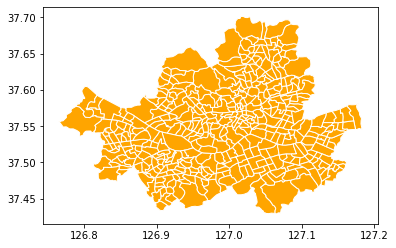

In [27]:
# _21 지도 그리기
%matplotlib inline
seoul_h_dong_gdf.plot(color='orange', edgecolor='white')

In [28]:
# _22 현재 위치정보(좌표)가 저장된 GeoSeries명 확인하기 - gemetry name확인
seoul_h_dong_gdf.geometry.name

'geometry'

In [29]:
# _23 컬럼명 변경하기
seoul_h_dong_gdf = seoul_h_dong_gdf.rename(columns={'geometry':'geom'})
df2md(seoul_h_dong_gdf.head())

(index)|SGG_NM|DONG_NM|SGG_CODE|H_CODE|SEDAE|SEDAE_INGU|TOTAL_POP|MALE_POP|FEMALE_POP|65_OVER|geom
---|---|---|---|---|---|---|---|---|---|---|---
0|종로구|사직동|11110|1111000|4414|2.14|9717|4467|5250|1708|POLYGON ((126.976888 ...
1|종로구|삼청동|11110|1111000|1414|2.06|3097|1459|1638|634|POLYGON ((126.982689 ...
2|종로구|부암동|11110|1111000|4325|2.39|10726|5160|5566|1748|POLYGON ((126.975851 ...
3|종로구|평창동|11110|1111000|7510|2.53|19163|9032|10131|3037|POLYGON ((126.975074 ...
4|종로구|무악동|11110|1111000|3024|2.75|8375|3921|4454|1279|POLYGON ((126.960673 ...


In [30]:
# _24 GeoDataFrame의 geometry 확인하기
# - 'geometry' column의 이름이 'geom'으로 변경되었으므로 에러가 난다.
seoul_h_dong_gdf.geometry

AttributeError: No geometry data set yet (expected in column 'geometry'.

In [32]:
# _25 GeoDataFrame에 geometry 등록하기
# - geometry data를 가지고 있는 column의 이름이 'geom'이라고 명시함
seoul_h_dong_gdf = seoul_h_dong_gdf.set_geometry('geom')
seoul_h_dong_gdf.geometry.name

'geom'

In [33]:
# _26 GeoDataFrame의 새로운 컬럼에 폴리곤 중심점 값을 할당하기
seoul_h_dong_gdf['cent'] = seoul_h_dong_gdf.centroid
df2md(seoul_h_dong_gdf.head())

(index)|SGG_NM|DONG_NM|SGG_CODE|H_CODE|SEDAE|SEDAE_INGU|TOTAL_POP|MALE_POP|FEMALE_POP|65_OVER|geom|cent
---|---|---|---|---|---|---|---|---|---|---|---|---
0|종로구|사직동|11110|1111000|4414|2.14|9717|4467|5250|1708|POLYGON ((126.976888 ...|POINT (126.970143694 ...
1|종로구|삼청동|11110|1111000|1414|2.06|3097|1459|1638|634|POLYGON ((126.982689 ...|POINT (126.981113715 ...
2|종로구|부암동|11110|1111000|4325|2.39|10726|5160|5566|1748|POLYGON ((126.975851 ...|POINT (126.962556748 ...
3|종로구|평창동|11110|1111000|7510|2.53|19163|9032|10131|3037|POLYGON ((126.975074 ...|POINT (126.969274019 ...
4|종로구|무악동|11110|1111000|3024|2.75|8375|3921|4454|1279|POLYGON ((126.960673 ...|POINT (126.958989050 ...


In [34]:
print(type(seoul_h_dong_gdf['geom']))   # GeoSeries
print(type(seoul_h_dong_gdf['cent']))   # Series

<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [35]:
# _27 해당 Dataframe의 geometry컬럼 변경하기
# - geometry column은 하나만 가질 수 있음.
seoul_h_dong_gdf = seoul_h_dong_gdf.set_geometry('cent')
seoul_h_dong_gdf.geometry.name

'cent'

In [36]:
df2md(seoul_h_dong_gdf.head(10))

(index)|SGG_NM|DONG_NM|SGG_CODE|H_CODE|SEDAE|SEDAE_INGU|TOTAL_POP|MALE_POP|FEMALE_POP|65_OVER|geom|cent
---|---|---|---|---|---|---|---|---|---|---|---|---
0|종로구|사직동|11110|1111000|4414|2.14|9717|4467|5250|1708|POLYGON ((126.976888 ...|POINT (126.970143694 ...
1|종로구|삼청동|11110|1111000|1414|2.06|3097|1459|1638|634|POLYGON ((126.982689 ...|POINT (126.981113715 ...
2|종로구|부암동|11110|1111000|4325|2.39|10726|5160|5566|1748|POLYGON ((126.975851 ...|POINT (126.962556748 ...
3|종로구|평창동|11110|1111000|7510|2.53|19163|9032|10131|3037|POLYGON ((126.975074 ...|POINT (126.969274019 ...
4|종로구|무악동|11110|1111000|3024|2.75|8375|3921|4454|1279|POLYGON ((126.960673 ...|POINT (126.958989050 ...
5|종로구|교남동|11110|1111000|4379|2.34|10363|4850|5513|1406|POLYGON ((126.969048 ...|POINT (126.964160977 ...
6|종로구|가회동|11110|1111000|2085|2.17|4657|2194|2463|900|POLYGON ((126.989135 ...|POINT (126.986618225 ...
7|종로구|종로1.2.3.4가동|11110|1111000|5378|1.41|8592|5045|3547|1865|POLYGON ((126.996499 ...|POINT (126.989733320 ...
8|종로구|종로5·6가동|11110|1111000|3174|1.69|5690|3096|2594|1089|POLYGON ((127.010160 ...|POINT (127.004240984 ...
9|종로구|이화동|11110|1111000|4462|1.85|8752|4075|4677|1302|POLYGON ((127.007332 ...|POINT (127.003069256 ...


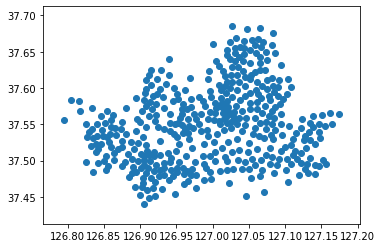

In [37]:
# _28 plot
# - geometry column이 cent로 변경되어 경계선이 아니라 점이 찍힌다.
seoul_h_dong_gdf.plot()

##  Writing data

In [38]:
# 폴더생성
!mkdir ./maps/output

mkdir: cannot create directory ‘./maps/output’: File exists


In [39]:
# _29 shp파일 저장하기 (에러발생)
# 파일 저장 시 GeoDataFrame에는 좌표정보가 반드시 하나만 있어야 한다.
seoul_h_dong_gdf.to_file('./maps/output/seoul_h_dong', encoding='utf-8')

ValueError: Invalid field type <class 'shapely.geometry.polygon.Polygon'>

In [40]:
# _30 불필요한 컬럼 제거하기
# 파일 저장 시 GeoDataFrame에는 좌표정보가 반드시 하나만 있어야 한다.
columns = ['SGG_NM', 'DONG_NM', 'SGG_CODE', 'TOTAL_POP', 'geom']
gdf = gpd.GeoDataFrame(seoul_h_dong_gdf[columns], geometry='geom')
df2md(gdf.head())

(index)|SGG_NM|DONG_NM|SGG_CODE|TOTAL_POP|geom
---|---|---|---|---|---
0|종로구|사직동|11110|9717|POLYGON ((126.976888 ...
1|종로구|삼청동|11110|3097|POLYGON ((126.982689 ...
2|종로구|부암동|11110|10726|POLYGON ((126.975851 ...
3|종로구|평창동|11110|19163|POLYGON ((126.975074 ...
4|종로구|무악동|11110|8375|POLYGON ((126.960673 ...


In [41]:
# _31 Dataframe 타입 확인
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [42]:
# _32 shp파일로 저장하기
gdf.to_file('./maps/output/seoul_h_dong', encoding='utf-8')

###### **Tip!** GeoDataFrame 저장 형식을 바꿀 때는 `driver` 사용

In [43]:
# _33 geojson으로 저장하기
gdf.to_file('./maps/output/seoul_h_dong.geojson', encoding='utf-8', driver='GeoJSON')

In [44]:
print(gdf['geom'][0])

POLYGON ((126.9768888427482 37.57565077944879, 126.9770344988775 37.56919453005455, 126.9759747282125 37.56933629942576, 126.9753747099125 37.56931556702156, 126.9743319356233 37.56926180051753, 126.9690483700185 37.56819441770833, 126.9685449360338 37.56842767961276, 126.9666499598212 37.56949165520658, 126.9662817502448 37.5697007347987, 126.9660973270804 37.5698565097237, 126.9657285292258 37.57018393611511, 126.9659269982213 37.5703188056862, 126.9660109401843 37.57154839557748, 126.963659220522 37.57517466066037, 126.9630860043451 37.57648592001554, 126.962840990512 37.57666158609274, 126.9628104104726 37.57944880965677, 126.9674243158433 37.57960153712449, 126.9674217630265 37.57926352144165, 126.9674300601846 37.57919257799861, 126.9674570900956 37.57897525058544, 126.9680660469963 37.57824678046787, 126.9689551169548 37.57793526234029, 126.9692128429691 37.57793529930939, 126.9694145388658 37.57812112414218, 126.9696644266947 37.57853113668221, 126.9696672191487 37.578736205134

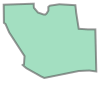

In [45]:
gdf['geom'][0]